In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [2]:
#make data frames for the data
ride_data = os.path.join("raw_data/ride_data.csv")
city_data = os.path.join("raw_data/city_data.csv")
ride_df = pd.read_csv(ride_data)
city_df = pd.read_csv(city_data)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#combine the data
combined_df = pd.merge(ride_df,city_df, on = "city", how = "right")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
#group by city
grouped_df = combined_df.groupby(["city","driver_count"])
grouped_df

In [5]:
total_fares = grouped_df["fare"].sum()
total_fares.head()

city          driver_count
Alvarezhaven  21              741.79
Alyssaberg    67              535.85
Anitamouth    16              335.84
Antoniomouth  21              519.75
Aprilchester  49              417.65
Name: fare, dtype: float64

In [6]:
#find total rides per city
total_rides = grouped_df["ride_id"].nunique()
total_rides.head()

city          driver_count
Alvarezhaven  21              31
Alyssaberg    67              26
Anitamouth    16               9
Antoniomouth  21              22
Aprilchester  49              19
Name: ride_id, dtype: int64

In [7]:
#find average price per ride
total_drivers = grouped_df["driver_count"].mean()
average_fare = total_fares / total_rides
average_fare.head()

city          driver_count
Alvarezhaven  21              23.928710
Alyssaberg    67              20.609615
Anitamouth    16              37.315556
Antoniomouth  21              23.625000
Aprilchester  49              21.981579
dtype: float64

In [8]:
type_of_city = grouped_df["type"].unique()
type_of_city = type_of_city.str[0]
type_of_city.head()

city          driver_count
Alvarezhaven  21                 Urban
Alyssaberg    67                 Urban
Anitamouth    16              Suburban
Antoniomouth  21                 Urban
Aprilchester  49                 Urban
Name: type, dtype: object

In [9]:
#merge all the dataframe
new_data = {"Total Riders" : total_rides,
           "Total Fares" : total_fares, "Average Fare" : average_fare,
            "City Type" : type_of_city}
new_df = pd.DataFrame(new_data)
new_df = new_df.reset_index()
new_df.head()

,city,driver_count,Average Fare,City Type,Total Fares,Total Riders
0,Alvarezhaven,21,23.928710,Urban,741.79,31
1,Alyssaberg,67,20.609615,Urban,535.85,26
2,Anitamouth,16,37.315556,Suburban,335.84,9
3,Antoniomouth,21,23.625000,Urban,519.75,22
4,Aprilchester,49,21.981579,Urban,417.65,19


In [10]:
ctypes = ["Urban","Suburban","Rural"]
fg = sns.FacetGrid(data=new_df, hue='City Type', hue_order=ctypes, aspect=1.61)
fg.map(plt.scatter, "Total Riders", "Average Fare", "driver_count",alpha = .45, linewidth = 2).add_legend()

In [11]:
plt.title("Uber Data in Different City Types")
plt.xlabel("Riders per City")
plt.ylabel("Average Fare ($) per City")
plt.xlim(0,40)
plt.ylim(15,55)

(15, 55)

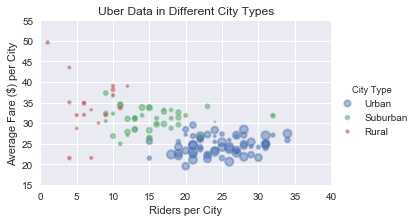

In [12]:
plt.show()

In [32]:
#% total fares by city type
pie_group = new_df.groupby("City Type")
pie_group_fares = pie_group["Total Fares"].sum()
pie_group_fares

City Type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: Total Fares, dtype: float64

In [33]:
cities = ["Urban", "Suburban","Rural"]
city_fares = [40078.34,20335.69,4255.09]
explode = [.1,0,0]
colors = ["red", "lightcoral", "lightskyblue"]
plt.title("Total Fares by City Type")
plt.pie(city_fares, explode = explode, labels = cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.2108148572569786,
 1.119508187827537,
 -1.1505575694756089,
 1.1024075033082694)

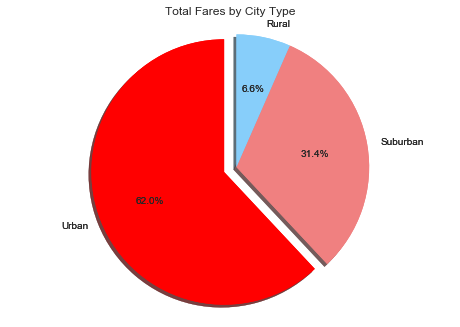

In [34]:
plt.show()

In [39]:
#% of total rides per city
pie_group["Total Riders"].sum()

City Type
Rural        125
Suburban     657
Urban       1625
Name: Total Riders, dtype: int64

In [40]:
city_riders = [1625, 657, 125]
plt.title("Total Riders by City Type")
plt.pie(city_riders, explode = explode, labels = city_riders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.1932705425802141,
 1.1098032420872641,
 -1.1614913715500408,
 1.1029281738927599)

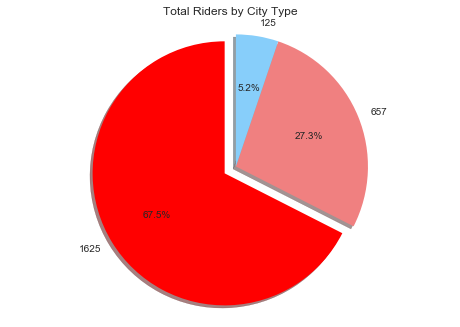

In [41]:
plt.show()

In [43]:
#% total drivers by city
pie_group["driver_count"].sum()

City Type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

In [44]:
driver_count = [2607,638,104]
plt.title("Total Drivers by City Type")
plt.pie(driver_count, explode = explode, labels = cities, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.1701245406694292,
 1.0866561826119843,
 -1.1858793591165591,
 1.1040894932912575)

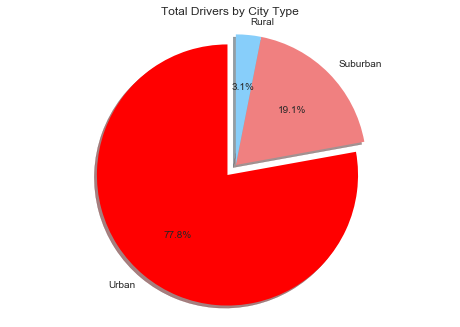

In [45]:
plt.show()